# Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

# Preprocess

## Sample Data

In [38]:
# Sample data
df_sample = pd.read_excel("data_macrophage/CBA/csv/11am plate 3 cytometer 2 pod 17 & 17 & 27 & 25.xlsx")
df_sample

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null)
0,Specimen_001_A1_A01.fcs,4.49,95.80,7.94
1,Specimen_001_A2_A02.fcs,19.10,98.40,5.82
2,Specimen_001_A3_A03.fcs,20.80,98.80,49.00
3,Specimen_001_B1_B01.fcs,4.22,100.00,1409.00
4,Specimen_001_B2_B02.fcs,25.10,99.00,1519.00
...,...,...,...,...
93,Specimen_004_H10_H10.fcs,15.00,95.30,8.01
94,Specimen_004_H11_H11.fcs,3.73,95.60,14.50
95,Specimen_004_H12_H12.fcs,2.22,84.60,33.00
96,Mean,12.00,94.90,898.00


In [39]:
df_filtered = df_sample[24:48]
df_filtered

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null)
24,Specimen_002_A4_A04.fcs,7.78,97.5,10.40
25,Specimen_002_A5_A05.fcs,17.10,98.5,7.09
26,Specimen_002_A6_A06.fcs,4.68,97.7,6.23
27,Specimen_002_B4_B04.fcs,15.80,99.4,1565.00
28,Specimen_002_B5_B05.fcs,21.50,99.6,1754.00
29,Specimen_002_B6_B06.fcs,32.70,98.9,1338.00
30,Specimen_002_C4_C04.fcs,31.60,99.8,1292.00
31,Specimen_002_C5_C05.fcs,36.10,99.6,1111.00
32,Specimen_002_C6_C06.fcs,1.05,100.0,1291.00
33,Specimen_002_D4_D04.fcs,13.90,98.5,1558.00


## Standard Data

In [40]:
# Standard
df_standard = pd.read_excel("data_macrophage/CBA/csv/standard cytometer 3.xlsx")
df_standard

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null)
0,Specimen_001_A1_A01.fcs,16.20,95.20,1562.00
1,Specimen_001_A2_A02.fcs,21.00,98.00,955.00
2,Specimen_001_A3_A03.fcs,22.50,95.70,572.00
3,Specimen_001_A4_A04.fcs,27.90,98.10,268.00
4,Specimen_001_A5_A05.fcs,23.00,97.10,157.00
5,Specimen_001_A6_A06.fcs,25.90,99.50,55.80
6,Specimen_001_A7_A07.fcs,22.50,97.10,41.50
7,Specimen_001_A8_A08.fcs,26.40,98.40,20.70
8,Specimen_001_A9_A09.fcs,19.50,97.30,16.80
9,Specimen_001_A10_A10.fcs,23.50,97.90,9.34


# Analyse

In [41]:
x_tnf = np.array([2500, 1250, 625, 312, 156, 80, 40, 20, 10, 5, 2.5, 0])
y_mfi = np.array(df_standard["beads/tnf | Mean (PE-A :: null)"].iloc[0:12])

## Generic trendline for scatter plot

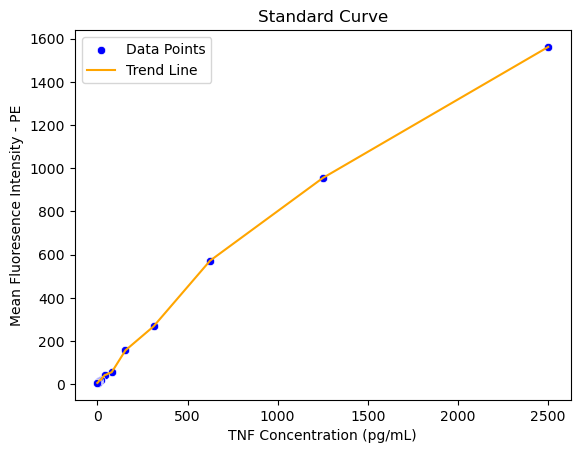

In [42]:
# Scatter plot for data points
sns.scatterplot(x=x_tnf, y=y_mfi, color='blue', label='Data Points')

# Line plot for the trend line using matplotlib
plt.plot(x_tnf, y_mfi, color='orange', label='Trend Line')

# Customize the plot
plt.title("Standard Curve")
plt.xlabel("TNF Concentration (pg/mL)")
plt.ylabel("Mean Fluoresence Intensity - PE")
plt.legend()
plt.show()

## Sigmoidal 4PL, X is concentration Function

In [43]:
# Define the 4PL function
def four_param_logistic(x, A, B, C, D):
    return ((A - D) / (1.0 + ((x / C) ** B))) + D

In [44]:
# Initial parameter guesses for A, B, C, D
initial_guess = [min(y_mfi), 1, np.median(x_tnf), max(y_mfi)]

# Fit the 4PL model to the data
params, _ = curve_fit(four_param_logistic, x_tnf, y_mfi, p0=initial_guess, maxfev=10000)

# Generate x values for the fitted curve
x_fit = np.linspace(min(x_tnf), max(x_tnf), 100)
y_fit = four_param_logistic(x_fit, *params)

/tmp/ipykernel_9428/1527236024.py:3: RuntimeWarning: divide by zero encountered in power
  return ((A - D) / (1.0 + ((x / C) ** B))) + D


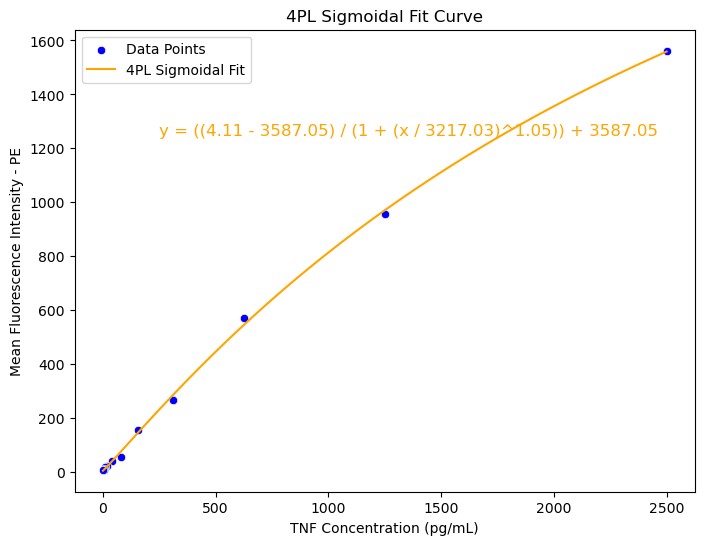

Fitted parameters:
A (bottom asymptote) = 4.11
B (Hill's slope) = 1.05
C (inflection point) = 3217.03
D (top asymptote) = 3587.05

Fitted 4PL Equation:
y = ((4.11 - 3587.05) / (1 + (x / 3217.03)^1.05)) + 3587.05


In [45]:
# Plot the data points and the fitted 4PL curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_tnf, y=y_mfi, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='orange', label='4PL Sigmoidal Fit')

# Display the equation parameters on the plot
equation_text = (f"y = (({params[0]:.2f} - {params[3]:.2f}) / "
                 f"(1 + (x / {params[2]:.2f})^{params[1]:.2f})) + {params[3]:.2f}")
plt.text(0.1 * max(x_tnf), 0.8 * max(y_mfi), equation_text, fontsize=12, color="orange")

# Customize plot
plt.title("4PL Sigmoidal Fit Curve")
plt.xlabel("TNF Concentration (pg/mL)")
plt.ylabel("Mean Fluorescence Intensity - PE")
plt.legend()
plt.show()

# Print the fitted parameters and equation
print("Fitted parameters:")
print(f"A (bottom asymptote) = {params[0]:.2f}")
print(f"B (Hill's slope) = {params[1]:.2f}")
print(f"C (inflection point) = {params[2]:.2f}")
print(f"D (top asymptote) = {params[3]:.2f}")
print("\nFitted 4PL Equation:")
print(equation_text)


## Interpolate TNF Concentrations

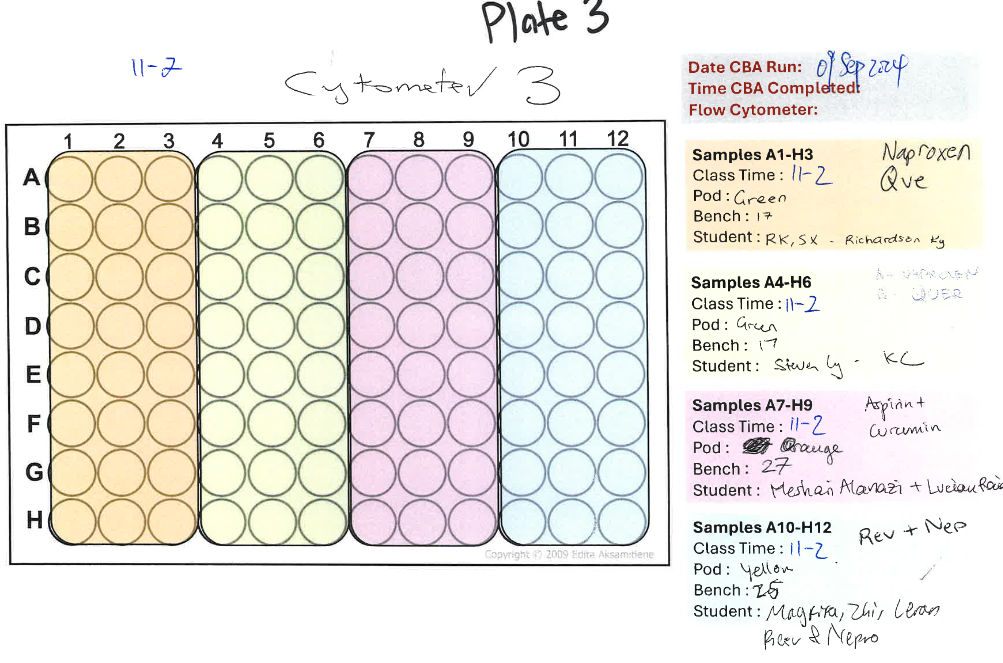

In [47]:
# Equation
# y = ((4.11 - 3587.05) / (1 + (x / 3217.03)^1.05)) + 3587.05

In [51]:
# Fitted parameters
A = 4.11  # Bottom asymptote
B = 1.05  # Hill's slope
C = 3217.03  # Inflection point
D = 3587.05  # Top asymptote

# Define the inverse 4PL equation to solve for x (TNF concentration)
def calculate_tnf_concentration(y, A, B, C, D):
    if y <= D:
        return C * (((A - D) / (y - D)) - 1)**(1 / B)
    else:
        return np.nan  # Handle case where y > D (not realistic for this fit)

# Apply the function to calculate TNF concentration for each MFI value
df_filtered['Interpolated_TNF'] = df_filtered['beads/tnf | Mean (PE-A :: null)'].apply(lambda y: calculate_tnf_concentration(y, A, B, C, D))

# Display the updated DataFrame
df_filtered


/tmp/ipykernel_9428/1361196604.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Interpolated_TNF'] = df_filtered['beads/tnf | Mean (PE-A :: null)'].apply(lambda y: calculate_tnf_concentration(y, A, B, C, D))


,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null),Interpolated_TNF
24,Specimen_002_A4_A04.fcs,7.78,97.5,10.40,7.652644
25,Specimen_002_A5_A05.fcs,17.10,98.5,7.09,3.753564
26,Specimen_002_A6_A06.fcs,4.68,97.7,6.23,2.713351
27,Specimen_002_B4_B04.fcs,15.80,99.4,1565.00,2514.136382
28,Specimen_002_B5_B05.fcs,21.50,99.6,1754.00,3077.880247
29,Specimen_002_B6_B06.fcs,32.70,98.9,1338.00,1956.049241
30,Specimen_002_C4_C04.fcs,31.60,99.8,1292.00,1855.624025
31,Specimen_002_C5_C05.fcs,36.10,99.6,1111.00,1494.343366
32,Specimen_002_C6_C06.fcs,1.05,100.0,1291.00,1853.482650
33,Specimen_002_D4_D04.fcs,13.90,98.5,1558.00,2495.171324


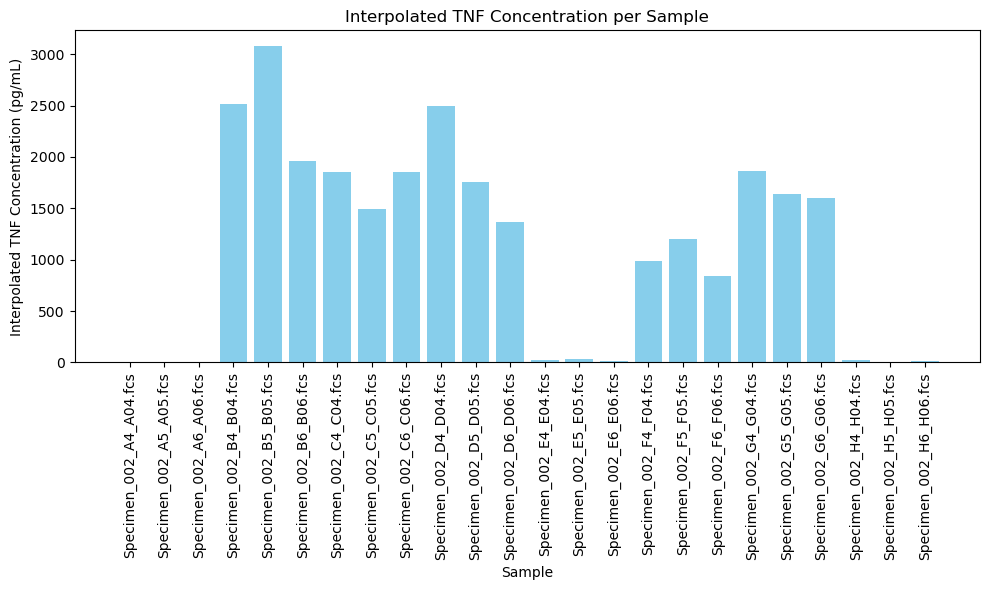

In [52]:
# Displalay graph
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['Sample'], df_filtered['Interpolated_TNF'], color='skyblue')
plt.xlabel('Sample')
plt.ylabel('Interpolated TNF Concentration (pg/mL)')
plt.title('Interpolated TNF Concentration per Sample')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()